In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [82]:
filename = "../data/raw/AirQualityUCI.csv"
df = pd.read_csv(
    filename,
    delimiter=';',
    decimal=',',
)

# parsing and dropping columns
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)

# missing values
df.dropna(how='all', inplace=True)
df.replace(-200, pd.NA, inplace=True)
col = [c for c in df.columns if c not in ['DateTime']]
df[col] = df[col].apply(pd.to_numeric, errors='coerce')
df.interpolate(method='linear', inplace=True)

# round
c = [c for c in df.columns if c not in ['DateTime', 'AH']]
df[c] = df[c].apply(lambda x: x.round(1))

# index datetime
df.set_index('DateTime', inplace=True)

# save this cleaned data as csv
df_line = (df.groupby(df.index.floor('D'))
            .mean()
            .round(2)
            .reset_index()
            .rename(columns={'DateTime': 'Date'})
        )
df_line

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1.97,1316.50,86.50,8.45,912.33,132.00,1167.33,108.83,1545.50,1096.00,12.03,54.90,0.77
1,2004-03-11,2.17,1244.17,104.50,7.98,851.96,139.75,1277.25,97.67,1522.83,885.25,9.84,64.08,0.78
2,2004-03-12,2.76,1281.67,158.38,12.13,1008.29,171.69,1101.88,114.62,1627.29,1084.38,11.29,51.10,0.66
3,2004-03-13,2.64,1330.67,139.25,10.92,992.83,180.75,993.21,117.35,1595.79,1245.92,12.87,51.53,0.73
4,2004-03-14,2.44,1361.12,116.96,9.64,943.92,144.62,1001.29,109.67,1602.38,1234.21,16.01,48.85,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2005-03-31,1.39,1008.12,275.00,5.22,749.42,185.08,795.67,100.71,1176.54,763.83,17.55,50.08,0.95
387,2005-04-01,1.08,903.29,275.00,3.41,663.00,161.83,946.88,107.33,943.25,523.96,15.93,35.96,0.64
388,2005-04-02,0.85,890.96,275.00,2.53,616.29,142.38,991.75,100.17,864.33,481.75,15.48,32.22,0.55
389,2005-04-03,1.14,981.38,275.00,4.32,714.71,167.67,856.17,111.12,985.17,717.08,18.38,33.70,0.62


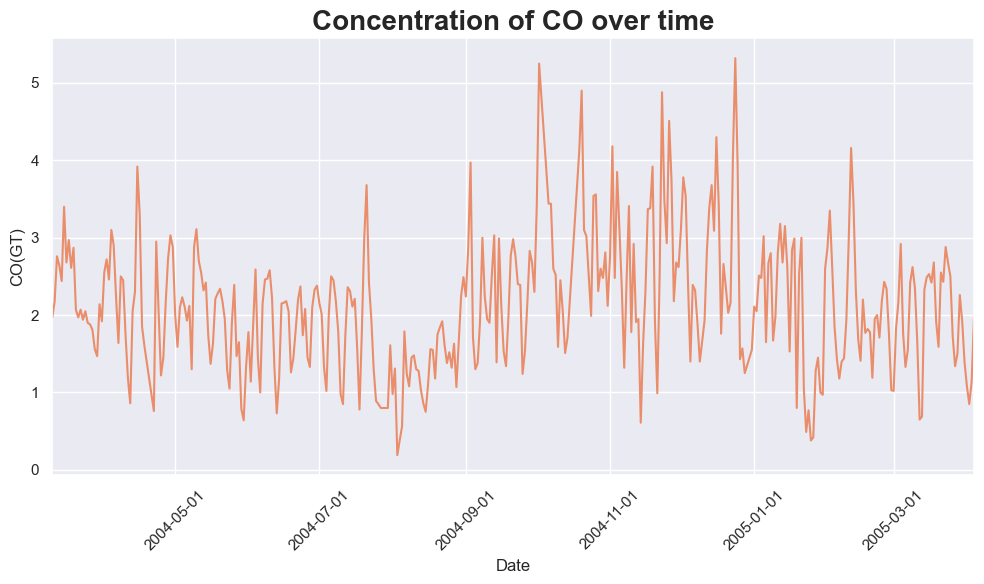

In [92]:

# global theme and palette
sns.set_theme(style="darkgrid", palette='flare')

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_line, x='Date', y='CO(GT)', ax=ax)
ax.set_xlim(df_line['Date'].min(), df_line['Date'].max())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax.set_title('Concentration of CO over time', fontsize=20, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('CO(GT)')

plt.tight_layout()